<a href="https://colab.research.google.com/github/ManishShah120/COVID19-Visualization/blob/master/COVID19_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Research about the recent cases 
of COVID-19 in India and Iran<br>

2. Read news every day, collect the data and update the dataset till next week
3. Find the total number of COVID-19 cases in India till date
4. Which state is the most recent with COVID-19 case?
5. What is the total number of active COVID-19 cases in India?
6. Create multiple visualization and compare the spread of COVID-19 in India with Iran
7. Use Prophet to forecast the data for next 10 days with 97% confidence interval
8. Write down your inference after plotting the visualization. Tell us if trend of COVID-19 in
India is similar to Iran.
9. Write down a theory to justify your inference.

## 1. Research about the recent cases of COVID-19 in India and Iran

**India** faces multiple major challenges on the COVID-19 front. It is densely populated: 464 people/km2 compared with Italy’s 206, Spain’s 91, Iran’s 52 and the USA’s 36. It has a huge population: 1380 million (USA 330 million, Iran 83 million, Italy 60 million, Spain 46 million). Social distancing without total shutdowns is unthinkable, especially in the big cities with crowded streets, trains, buses and offices. Cough hygiene is largely absent. Hand hygiene is equally suspect. The latest data from the government National sample survey organisation say that only 36% of Indians wash their hands with soap before a meal.1 Even more distressingly, 160 million Indians do not have access to clean water to wash their hands.2 The research suggests that diabetes and hypertension worsen COVID-19 outcomes: the prevalence among Indian adults of diabetes and hypertension is 10% and 25%, respectively. India has high rates of TB and pneumonia. People have resisted being screened and flouted quarantines with impunity.3 The awareness about disease dynamics is very poor, even among the wealthier and more educated parts of the population: after the national voluntary ‘people’s curfew’ called by the prime minister on 22 March, which was by and large a success, people came out on the streets and celebrated with no attention to social distancing, achieving the exact opposite of what the curfew was supposed to achieve. Imposing a lockdown is next to impossible in India’s vast rural hinterland, home to 900 million people (65% of the population). Seventy per cent of the rural population is dependent on agriculture and April and May is the harvesting season for their Rabi crops.

The COVID-19 pandemic in **Iran** is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). On 19 February 2020, Iran reported its first confirmed cases of infections in Qom.The virus may have been brought to the country by a merchant from Qom who had travelled to China. In response to the coronavirus the government cancelled public events and Friday prayers; closed schools, universities, shopping centres, bazaars, and holy shrines; and banned festival celebrations. Economic measures were also announced to help families and businesses, and the pandemic is credited with compelling the government to make an unprecedented request for an emergency loan of five billion US dollars from the International Monetary Fund. The government initially rejected plans to quarantine entire cities and areas, and heavy traffic between cities continued ahead of Nowruz, despite the government's intention to limit travel. The government later announced a ban on travel between cities following an increase in the number of new cases.Government restrictions were gradually eased starting in April. The number of new cases fell to a low on 2 May, but increased again in May as restrictions were eased, with a new peak reported on 4 June.

**Source/References**:
1. https://pmj.bmj.com/content/96/1137/422#ref-5
2. https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Iran

## 2. Read news every day, collect the data and update the dataset till next week

### Imports

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Scraping the Data

In [ ]:
from datetime import datetime #for date and time operations
import os # for file and folder operations
import re # for regular expression operations
import glob # for listing files in a folder
import requests # for getting web contents
from bs4 import BeautifulSoup # for scraping web contents

In [ ]:
link = 'https://www.mohfw.gov.in/'
req = requests.get(link) # get web data
soup = BeautifulSoup(req.content, "html.parser") # parse web data

In [ ]:
# get the table head
thead = soup.find_all('thead')[-1] # contains the column names, titles, subtitles
#print(thead)

# get all the rows in table head
head = thead.find_all('tr') # get the Coloumn Names
#print(head)

# get the table tbody
tbody = soup.find_all('tbody')[-1] # it contains the contents
#print(tbody)

# get all the rows in table body
body = tbody.find_all('tr') # each row is each state's entry
#print(body)

In [ ]:
# get the table contents
head_rows = [] # container for header rows / column title
body_rows = [] # container for table body / contents

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
#print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
#print(body_rows)

In [ ]:
# skipping the last 3 rows, as it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(
                        body_rows[:len(body_rows)-6],
                        columns=head_rows[0]
                    )

# Droping 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

df_bs

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,57,109,0,166
1,Andhra Pradesh,14274,16464,365,31103
2,Arunachal Pradesh,240,145,2,387
3,Assam,5876,10894,36,16806
4,Bihar,5482,12317,160,17959
5,Chandigarh,157,423,8,588
6,Chhattisgarh,996,3202,19,4217
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495
8,Delhi,19017,91312,3411,113740
9,Goa,1026,1540,17,2583


### Adding date-time information to the DataFrame

In [ ]:
# Adding date-time information to the DataFrame

# saving a copy of the dataframe before performing all the future tasks
df_India = df_bs.copy()

now = datetime.now()
df_India['Date'] = now.strftime("%m/%d/%Y") # Reformatting

# adding the 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')
df_India

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-14
1,Andhra Pradesh,14274,16464,365,31103,2020-07-14
2,Arunachal Pradesh,240,145,2,387,2020-07-14
3,Assam,5876,10894,36,16806,2020-07-14
4,Bihar,5482,12317,160,17959,2020-07-14
5,Chandigarh,157,423,8,588,2020-07-14
6,Chhattisgarh,996,3202,19,4217,2020-07-14
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495,2020-07-14
8,Delhi,19017,91312,3411,113740,2020-07-14
9,Goa,1026,1540,17,2583,2020-07-14


### Adding `latitude` and `longitude` information to the dataframe

In [ ]:
# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telangana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787,'Dadra and Nagar Haveli and Daman and Diu': 20.42, 
       'Gujarat': 22.2587, 'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 
       'Manipur':24.6637, 'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 
       'Assam' : 26.2006, 'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 
       'Nagaland': 26.1584, 'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telangana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Dadra and Nagar Haveli and Daman and Diu': 72.83, 
        'Gujarat': 71.1924, 'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 
        'Manipur':93.9063, 'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 
        'Assam' : 92.9376, 'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 
        'Nagaland': 94.5624, 'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

In [ ]:
df_India

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-14,11.7401,92.6586
1,Andhra Pradesh,14274,16464,365,31103,2020-07-14,15.9129,79.7400
2,Arunachal Pradesh,240,145,2,387,2020-07-14,28.2180,94.7278
3,Assam,5876,10894,36,16806,2020-07-14,26.2006,92.9376
4,Bihar,5482,12317,160,17959,2020-07-14,25.0961,85.3131
5,Chandigarh,157,423,8,588,2020-07-14,30.7333,76.7794
6,Chhattisgarh,996,3202,19,4217,2020-07-14,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495,2020-07-14,20.4200,72.8300
8,Delhi,19017,91312,3411,113740,2020-07-14,28.7041,77.1025
9,Goa,1026,1540,17,2583,2020-07-14,15.2993,74.1240


### Renaming Column

In [ ]:
df_India.columns

Index(['Name of State / UT', 'Active Cases*', 'Cured/Discharged/Migrated*',
       'Deaths**', 'Total Confirmed cases*', 'Date', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df_India = df_India.rename(columns={
                                        'Name of State / UT':'State/UT',
                                        'Active Cases*':'Active Cases',
                                        'Cured/Discharged/Migrated*': 'Cured',
                                        'Deaths**': 'Deaths',
                                        'Total Confirmed cases*': 'Confirmed',
                                   })

In [ ]:
df_India

,State/UT,Active Cases,Cured,Deaths,Confirmed,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-14,11.7401,92.6586
1,Andhra Pradesh,14274,16464,365,31103,2020-07-14,15.9129,79.7400
2,Arunachal Pradesh,240,145,2,387,2020-07-14,28.2180,94.7278
3,Assam,5876,10894,36,16806,2020-07-14,26.2006,92.9376
4,Bihar,5482,12317,160,17959,2020-07-14,25.0961,85.3131
5,Chandigarh,157,423,8,588,2020-07-14,30.7333,76.7794
6,Chhattisgarh,996,3202,19,4217,2020-07-14,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495,2020-07-14,20.4200,72.8300
8,Delhi,19017,91312,3411,113740,2020-07-14,28.7041,77.1025
9,Goa,1026,1540,17,2583,2020-07-14,15.2993,74.1240


### Converting from `object` type datatypes of the columns `Active Cases`, `Cured`, `Deaths`, `Confirmed`, to `Integer` datatypes

In [ ]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State/UT      35 non-null     object        
 1   Active Cases  35 non-null     object        
 2   Cured         35 non-null     object        
 3   Deaths        35 non-null     object        
 4   Confirmed     35 non-null     object        
 5   Date          35 non-null     datetime64[ns]
 6   Latitude      35 non-null     float64       
 7   Longitude     35 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [ ]:
df_India['Active Cases'] = df_India['Active Cases'].astype(int)
df_India['Cured'] = df_India['Cured'].astype(int)
df_India['Deaths'] = df_India['Deaths'].astype(int)
df_India['Confirmed'] = df_India['Confirmed'].astype(int)

In [ ]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State/UT      35 non-null     object        
 1   Active Cases  35 non-null     int64         
 2   Cured         35 non-null     int64         
 3   Deaths        35 non-null     int64         
 4   Confirmed     35 non-null     int64         
 5   Date          35 non-null     datetime64[ns]
 6   Latitude      35 non-null     float64       
 7   Longitude     35 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.3+ KB


### Saving the Updated Dataframe

In [ ]:
# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

## 3. Find the total number of COVID-19 cases in India till date

In [ ]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State/UT      35 non-null     object        
 1   Active Cases  35 non-null     int64         
 2   Cured         35 non-null     int64         
 3   Deaths        35 non-null     int64         
 4   Confirmed     35 non-null     int64         
 5   Date          35 non-null     datetime64[ns]
 6   Latitude      35 non-null     float64       
 7   Longitude     35 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.3+ KB


In [ ]:
Total_No_Cov_Cases = df_India['Confirmed'].sum()
print('Total number of Covid19 cases as of',now.strftime("%Y_%m_%d"),'in India is: ', Total_No_Cov_Cases)

Total number of Covid19 cases as of 2020_07_14 in India is:  904573


## 4. Which state is the most recent with COVID-19 case?

In [ ]:
df_temp = df_India.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UT,Active Cases,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,57,109,0,166
1,Andhra Pradesh,14274,16464,365,31103
2,Arunachal Pradesh,240,145,2,387
3,Assam,5876,10894,36,16806
4,Bihar,5482,12317,160,17959
5,Chandigarh,157,423,8,588
6,Chhattisgarh,996,3202,19,4217
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495
8,Delhi,19017,91312,3411,113740
9,Goa,1026,1540,17,2583


In [ ]:
Tot_Cases = df_India.groupby('State/UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Active Cases
State/UT,
Maharashtra,105935
Tamil Nadu,48199
Karnataka,24576
Delhi,19017
Andhra Pradesh,14274
Uttar Pradesh,12972
Telangana,12177
West Bengal,11279
Gujarat,10897


We can see from the above table that `Maharashtra` is the most recent state with COVID-19 case.

## 5. What is the total number of active COVID-19 cases in India?

In [ ]:
today = now.strftime("%Y_%m_%d")
total_active = df_India['Active Cases'].sum()
print("Total number of active COVID19 cases as of "+today+" are: ",total_active)

Total number of active COVID19 cases as of 2020_07_14 are:  309386


## 6. Create multiple visualization and compare the spread of COVID-19 in India with Iran

### Imports and Dataset URL's

In [ ]:
# Imports
import matplotlib.dates as mdates
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### Visualization and comparison between India and World

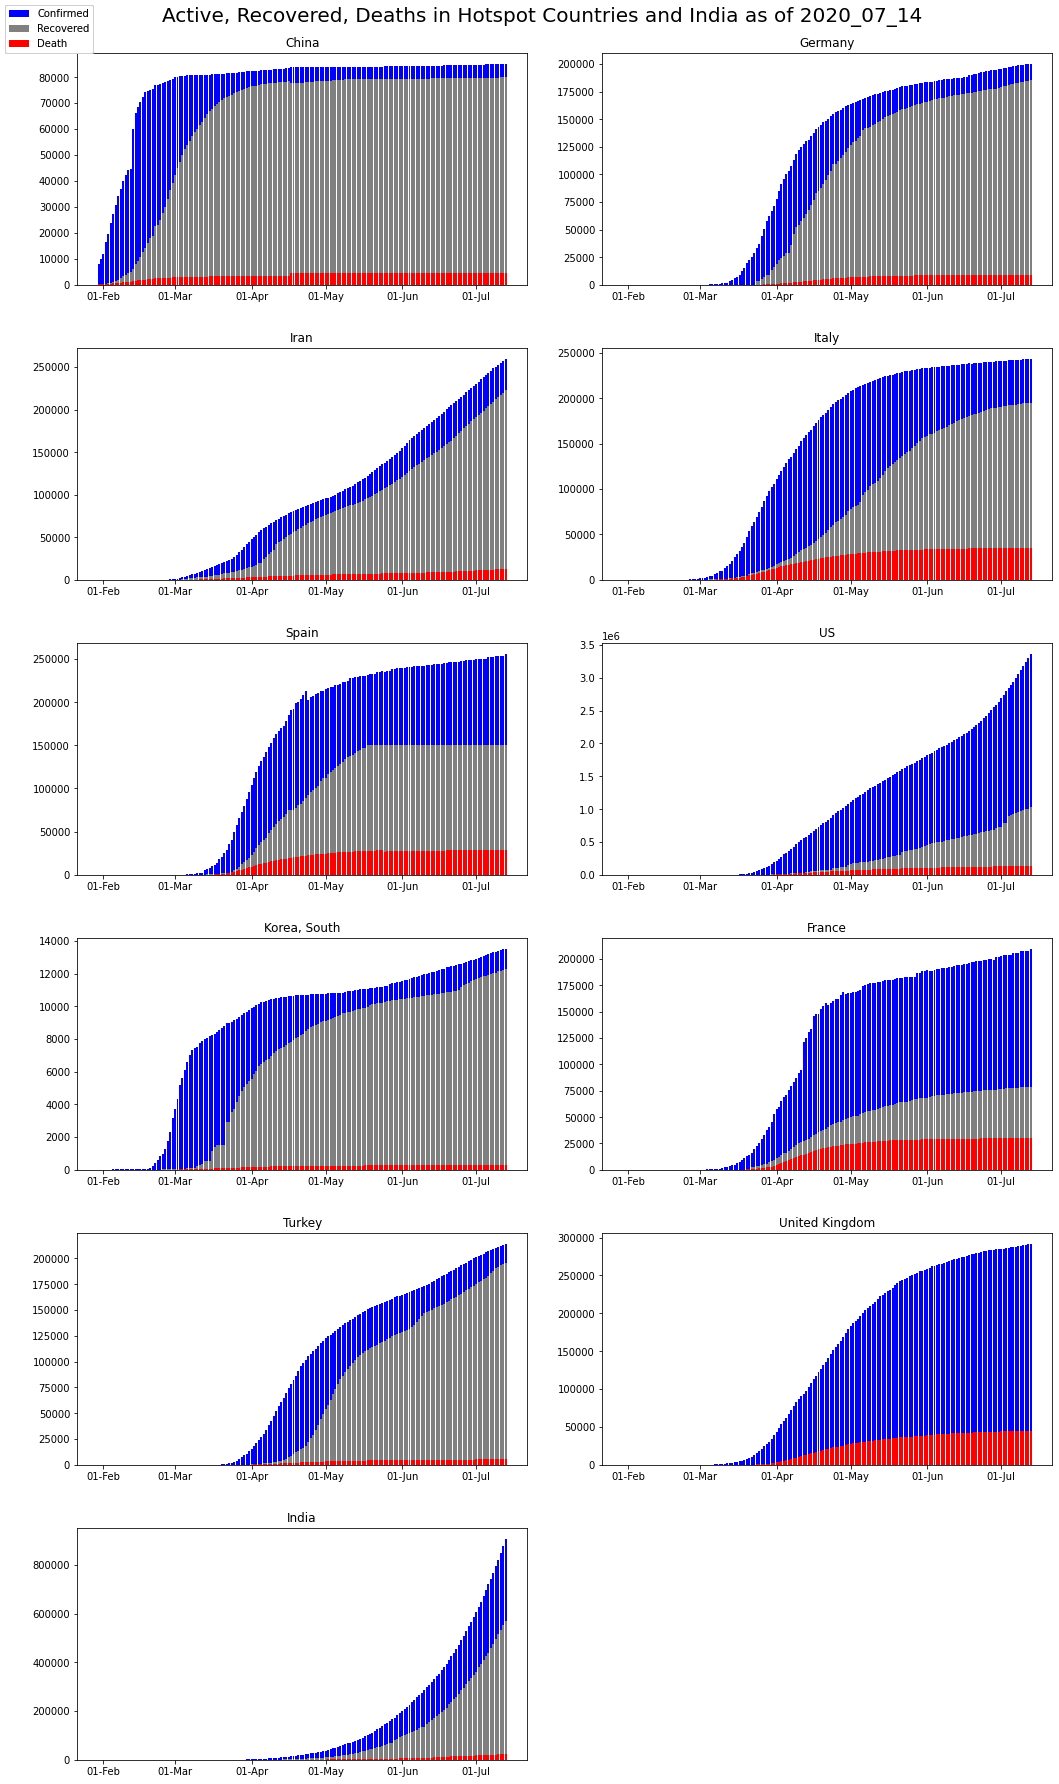

In [ ]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
      
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

### Visualization and comparison between India and Iran

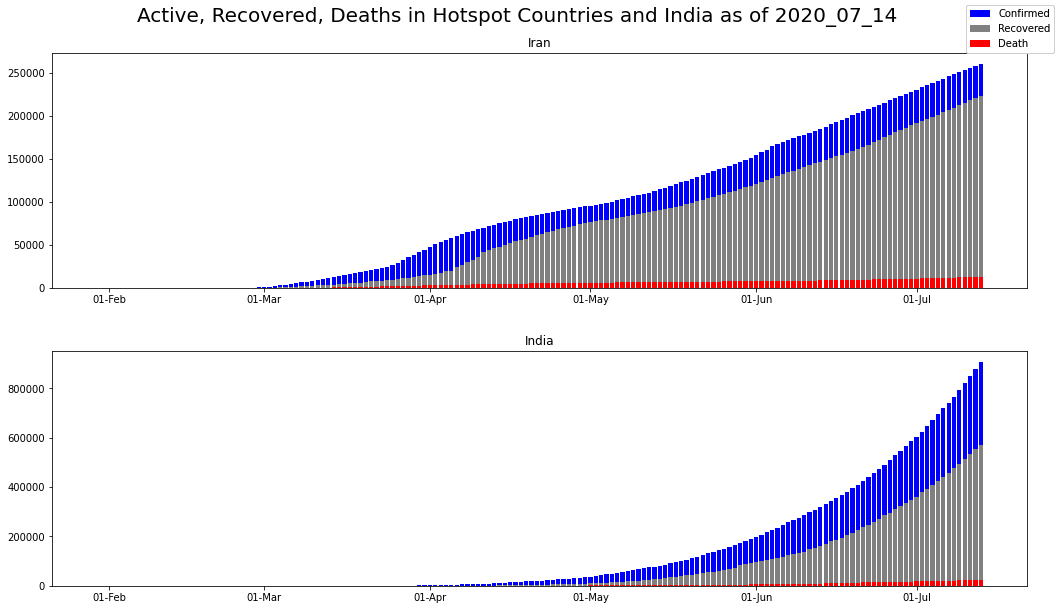

In [ ]:
hotspots = ['Iran','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]

fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
k=0
for i in range(1,3):
    ax = fig.add_subplot(6,1,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    k=k+1

plt.tight_layout(pad=3.0)

### Visualising the spread in India Geographically

In [ ]:
# Learn how to use folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_India['Latitude'], df_India['Longitude'], df_India['Confirmed'], df_India['State/UT']):
    folium.CircleMarker([lat, lon], radius=value*0.002, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [ ]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

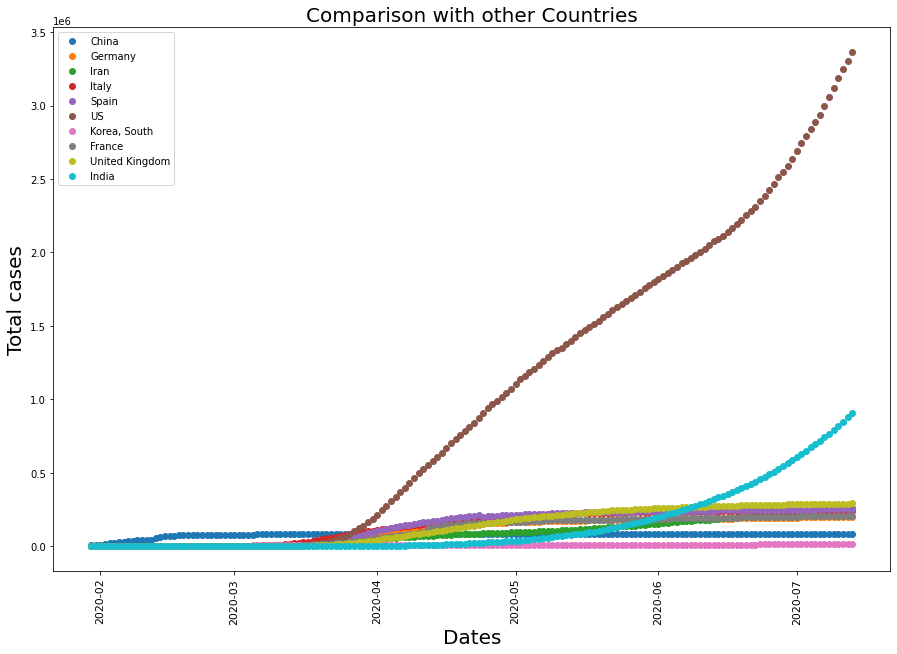

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

## 7. Use Prophet to forecast the data for next 10 days with 97% confidence interval

### Dataset URL's

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

### Installing Prophet

In [ ]:
!pip install Prophet

     |████████████████████████████████| 92kB 2.3MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=86cc06eaf364e841f89291ead094baf9fc992e715970d36cf820b6abf3f2042c
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


### Preparing for Predictions

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [ ]:
prop = Prophet(interval_width=0.97)
prop.fit(data)
future = prop.make_future_dataframe(periods=10)
future.tail(15)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
169,2020-07-09
170,2020-07-10
171,2020-07-11
172,2020-07-12
173,2020-07-13
174,2020-07-14
175,2020-07-15
176,2020-07-16
177,2020-07-17
178,2020-07-18


In [ ]:
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
179,2020-07-19,9.411453e+05,910407.534946,9.724269e+05
180,2020-07-20,9.589388e+05,925478.505337,9.918209e+05
181,2020-07-21,9.730932e+05,941330.578311,1.005007e+06
182,2020-07-22,9.905305e+05,955119.205278,1.025918e+06
183,2020-07-23,1.008091e+06,973437.376121,1.040653e+06


### Visualizations

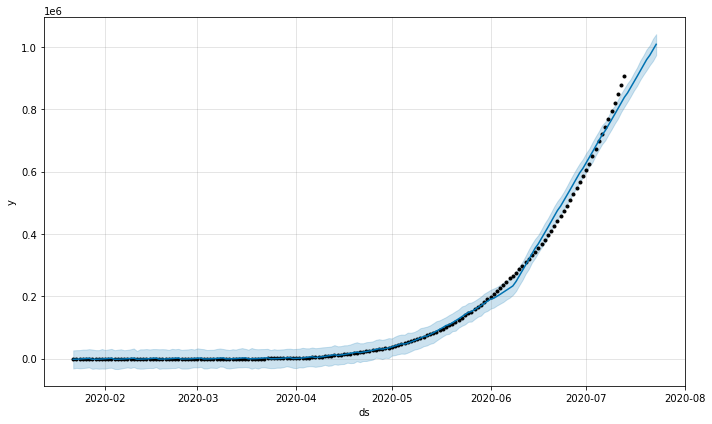

In [ ]:
confirmed_forecast_plot = prop.plot(forecast)

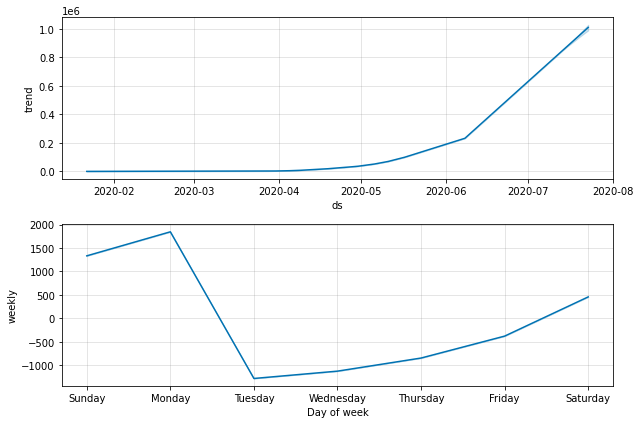

In [ ]:
confirmed_forecast_plot =prop.plot_components(forecast)

### ARIMA Model

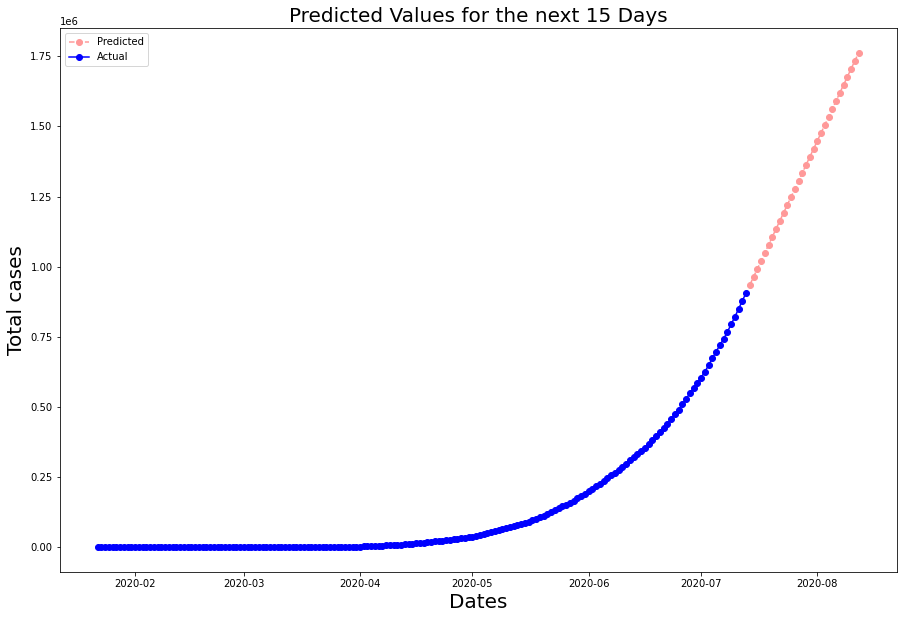

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

## 8. Write down your inference after plotting the visualization. Tell us if trend of COVID-19 in India is similar to Iran.



According to the Visualization and Comparison plot between India and Iran, It seems to ahow a bit similarity, but the plot of iran doesn't seem to have a streamlined rise, It contains some Ups and Downs while Increasing, But, incase of Plot of Indian Dataset, the growth is found to be streamlined and having a constant rate of growth.

## 9. Write down a theory to justify your inference.

Since, Both the country imposed total lockdown since the pandemic was going to take its peak, hence the initial growth rate of active covid casses of both the coutry was verry slow and both the countries got enough time to figure out its next steps, and plan new strategies. India imposed total lockdown for more than 3 weeks, and hence it has started to remove lockdown, in many states and the locked is still prevailed. Also There are also some similarity of demographic region of India and Iran, with which the plots of both the countries seems to be similar.

## The End